In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#import data set
df = pd.read_csv('price_pivot.csv')

In [3]:
scaler = StandardScaler()
df['scaled_A'] = scaler.fit_transform(df['A'].values.reshape(-1, 1))

In [4]:
df.head()

,date,A,B,C,D,E,scaled_A
0,2022-08-28,54.500000,50.840000,29.920000,21.286667,31.943333,-2.043023
1,2022-08-29,54.870000,39.526667,34.060000,42.946667,22.993333,-2.028754
2,2022-08-30,54.483333,40.183333,32.520000,40.583333,26.693333,-2.043666
3,2022-08-31,52.096667,41.420000,32.293333,31.693333,26.850000,-2.135711
4,2022-09-01,51.770000,43.150000,36.340000,46.303333,31.306667,-2.148310


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.head()

,date,A,B,C,D,E,scaled_A
0,2022-08-28,54.500000,50.840000,29.920000,21.286667,31.943333,-2.043023
1,2022-08-29,54.870000,39.526667,34.060000,42.946667,22.993333,-2.028754
2,2022-08-30,54.483333,40.183333,32.520000,40.583333,26.693333,-2.043666
3,2022-08-31,52.096667,41.420000,32.293333,31.693333,26.850000,-2.135711
4,2022-09-01,51.770000,43.150000,36.340000,46.303333,31.306667,-2.148310


In [7]:
len(df)

761

In [8]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
window_size = 5
X, y = create_sequences(df['scaled_A'][:train_size].values, window_size)
X_test, y_test = create_sequences(df['scaled_A'][train_size:].values, window_size)

In [11]:
# Reshape for LSTM: [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [13]:
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10


17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.5485 - val_loss: 0.5632
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.5485 - val_loss: 0.5632
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1195 - val_loss: 0.2423
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1195 - val_loss: 0.2423
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0469 - val_loss: 0.1277
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0469 - val_loss: 0.1277
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0244 - val_loss: 0.0594
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0244 - val_loss: 0.0594
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0200 - val_loss: 0.0450
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0200 - val_loss: 0.0450
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0157 - val_loss: 0.0423
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0157 - val_loss

In [18]:
X.shape

(603, 5, 1)

In [21]:
X

array([[[-2.04302336],
        [-2.02875378],
        [-2.04366613],
        [-2.13571132],
        [-2.14830969]],

       [[-2.02875378],
        [-2.04366613],
        [-2.13571132],
        [-2.14830969],
        [-2.1499809 ]],

       [[-2.04366613],
        [-2.13571132],
        [-2.14830969],
        [-2.1499809 ],
        [-2.11321425]],

       ...,

       [[ 1.14487697],
        [ 1.22046715],
        [ 1.24524608],
        [ 1.24707798],
        [ 1.22846968]],

       [[ 1.22046715],
        [ 1.24524608],
        [ 1.24707798],
        [ 1.22846968],
        [ 1.2724354 ]],

       [[ 1.24524608],
        [ 1.24707798],
        [ 1.22846968],
        [ 1.2724354 ],
        [ 1.24148585]]])

In [20]:
X_test.shape

(148, 5, 1)

In [23]:
X_pred, y = create_sequences(df['scaled_A'].values, window_size)
X_pred = X_pred.reshape((X_pred.shape[0], X_pred.shape[1], 1))
predictions = model.predict(X_pred)

# Inverse transform to original scale
predicted_values = scaler.inverse_transform(predictions)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [34]:
predicted_values.flatten()

array([ 56.09432 ,  55.651485,  55.220295,  54.911427,  55.06929 ,
        55.473225,  55.639107,  55.53185 ,  55.38584 ,  55.23226 ,
        54.927982,  55.233883,  55.38748 ,  55.552944,  55.168446,
        54.901474,  54.67183 ,  54.60072 ,  54.39286 ,  54.692795,
        54.43896 ,  54.176304,  53.767147,  53.301117,  52.901176,
        52.534954,  52.66384 ,  53.201794,  54.154568,  55.2109  ,
        56.325657,  57.00296 ,  57.110783,  56.779358,  56.580845,
        56.617832,  56.83821 ,  57.272026,  57.93238 ,  58.349224,
        58.59779 ,  58.85577 ,  59.161953,  59.403454,  59.389793,
        59.25192 ,  59.246937,  59.209354,  59.584038,  60.327454,
        61.43086 ,  62.53435 ,  63.696445,  64.32611 ,  64.73469 ,
        65.00404 ,  65.17261 ,  65.20005 ,  65.20846 ,  65.09319 ,
        65.15892 ,  65.43718 ,  66.05924 ,  66.9078  ,  67.748985,
        68.50432 ,  68.895386,  69.24571 ,  69.50423 ,  70.18878 ,
        70.83187 ,  71.70849 ,  72.63534 ,  73.400604,  73.663

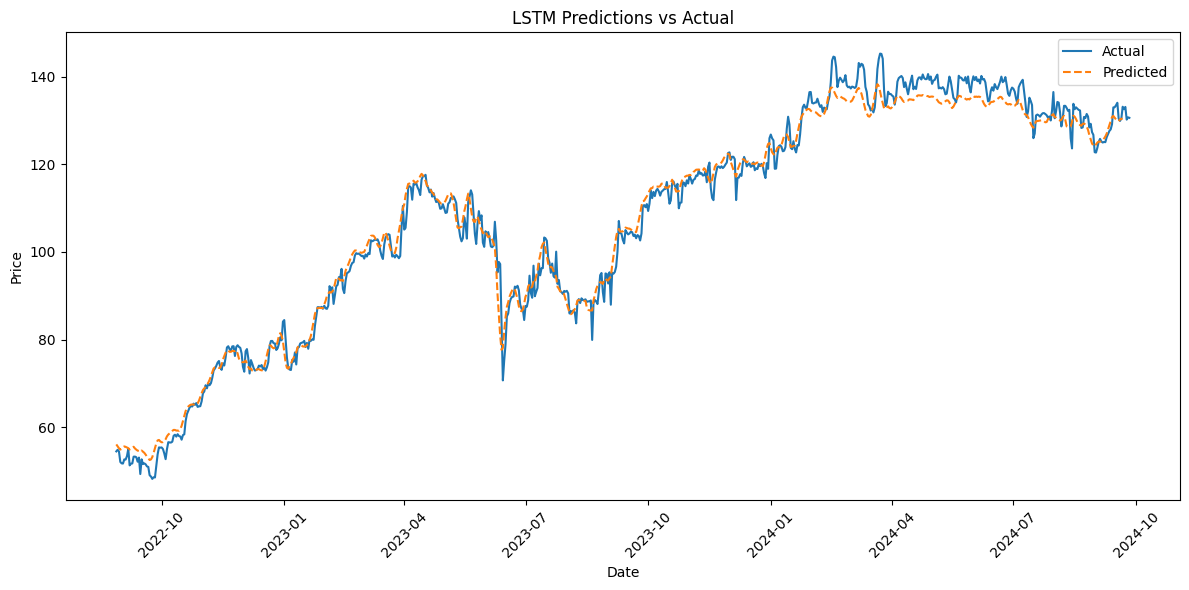

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['A'], label='Actual')
plt.plot(df['date'][:-5], predicted_values.flatten(), label='Predicted', linestyle='--')
plt.title('LSTM Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [39]:
myarray = np.array([[[0.02],[0.03],[0.001],[0.009],[0.006]]])

In [40]:
myarray.shape

(1, 5, 1)

In [41]:
mypred = model.predict(myarray)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


In [51]:
act = scaler.inverse_transform(mypred)
print('My prediction:',act[0][0])

My prediction: 109.05698
